In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


**Step 2: Importing dataset**

In [2]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [10]:
df1=df.sort_values(by=['Country'],ascending=[True])
df1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes
2,Germany,30.0,54000.0,No
4,Germany,40.0,NaN,Yes
8,Germany,50.0,83000.0,No
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
6,Spain,NaN,52000.0,No


In [11]:
df2=df1.fillna(method='ffill')
df2

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
9,France,37.0,67000.0,Yes
2,Germany,30.0,54000.0,No
4,Germany,40.0,54000.0,Yes
8,Germany,50.0,83000.0,No
1,Spain,27.0,48000.0,Yes
3,Spain,38.0,61000.0,No
6,Spain,38.0,52000.0,No


In [13]:
df2.isna().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Purchased']=le.fit_transform(df2['Purchased'])
df2['Country']=le.fit_transform(df2['Country'])
df2

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,0
5,0,35.0,58000.0,1
7,0,48.0,79000.0,1
9,0,37.0,67000.0,1
2,1,30.0,54000.0,0
4,1,40.0,54000.0,1
8,1,50.0,83000.0,0
1,2,27.0,48000.0,1
3,2,38.0,61000.0,0
6,2,38.0,52000.0,0


**Step 5: Creating a dummy variable**

In [15]:
x=df2.iloc[:,:3].values
y=df2.iloc[:,3].values
x,y

(array([[0.0e+00, 4.4e+01, 7.2e+04],
        [0.0e+00, 3.5e+01, 5.8e+04],
        [0.0e+00, 4.8e+01, 7.9e+04],
        [0.0e+00, 3.7e+01, 6.7e+04],
        [1.0e+00, 3.0e+01, 5.4e+04],
        [1.0e+00, 4.0e+01, 5.4e+04],
        [1.0e+00, 5.0e+01, 8.3e+04],
        [2.0e+00, 2.7e+01, 4.8e+04],
        [2.0e+00, 3.8e+01, 6.1e+04],
        [2.0e+00, 3.8e+01, 5.2e+04]]), array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0]))

**Step 6: Splitting the datasets into training sets and Test sets**

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
xtrain,xtest

(array([[1.0e+00, 4.0e+01, 5.4e+04],
        [2.0e+00, 2.7e+01, 4.8e+04],
        [0.0e+00, 3.5e+01, 5.8e+04],
        [2.0e+00, 3.8e+01, 5.2e+04],
        [0.0e+00, 3.7e+01, 6.7e+04],
        [0.0e+00, 4.8e+01, 7.9e+04],
        [0.0e+00, 4.4e+01, 7.2e+04],
        [1.0e+00, 3.0e+01, 5.4e+04]]), array([[1.0e+00, 5.0e+01, 8.3e+04],
        [2.0e+00, 3.8e+01, 6.1e+04]]))

**Step 7: Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

# CORRELATION

In [19]:
df2.corr()

,Country,Age,Salary,Purchased
Country,1.000000,-0.389893,-0.553374,-0.361158
Age,-0.389893,1.000000,0.876560,-0.188803
Salary,-0.553374,0.876560,1.000000,-0.140894
Purchased,-0.361158,-0.188803,-0.140894,1.000000


# EDA

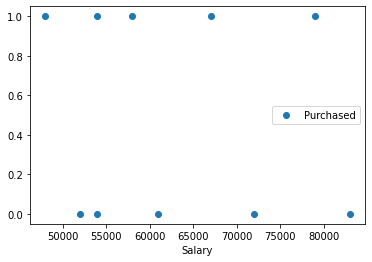

In [20]:
df2.plot('Salary','Purchased',style='o')

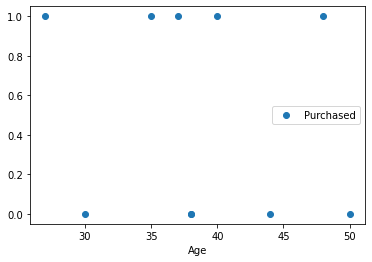

In [21]:
df2.plot('Age','Purchased',style='o')

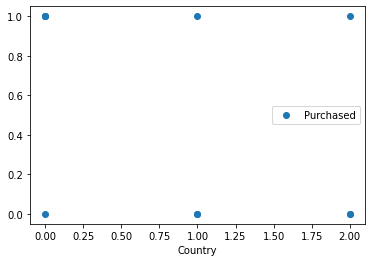

In [22]:
df2.plot('Country','Purchased',style='o')